## **Прогнозирование цены недвижимости в России**

# Описание датасета

**Недвижимость в России 2018-2021 (5 400 000 объектов недвижимости).**

Источник данных:
https://www.kaggle.com/mrdaniilak/russia-real-estate-20182021


**В датасете 13 признаков:**

date - дата публикации обявления

time - время публикации обявления

geo_lat - координата широты

geo_lon - координата долготы

region - регион России. Всего 85 регионов.

building_type - вид фасада дома. 0 - другое. 1 - панельный. 2 - монолитный. 3 - кирпичный. 4 - блочный. 5 - деревянный

object_type - тип объекта (квартиры). 1 - вторичное жилье; 2 - новостройка

level - этаж квартиры

levels - количество этажей в доме

rooms - количество жилых комнат. Значение "-1" для квартир-студий.

area - общая площадь квартиры

kitchen_area - площадь кухни

price - цена в рублях


# Загрузка библиотек и файла

In [ ]:
#pip install geopandas

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data_estate = pd.read_csv('/content/drive/MyDrive/Demo projects/data_estate.csv')
data_estate.head(5)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


# Исследование и обработка данных

In [ ]:
data_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [ ]:
# посмотрим размерность
data_estate.shape

(5477006, 13)

In [ ]:
# проверим на пропуски
data_estate.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [ ]:
# удалим время размещения объявления
data_estate = data_estate.drop(['time'], axis=1)

In [ ]:
# извлечем год объявления о продаже отдельным столбцом, посмотрим распределение по годам
data_estate['date'] = pd.to_datetime(data_estate.date)
data_estate['year'] = data_estate.date.dt.year
data_estate.value_counts('year')

year
2019    2234260
2020    1804057
2018     871581
2021     567108
dtype: int64

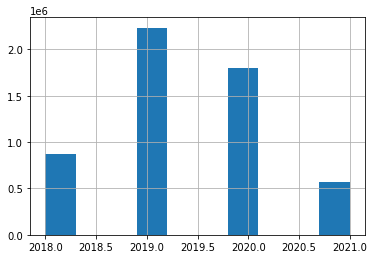

In [ ]:
data_estate['year'].hist()

In [ ]:
# удалим дату размещения объявления
data_estate = data_estate.drop(['date'], axis=1)

In [ ]:
#Проверим признак rooms на корректность данных:
data_estate.value_counts('rooms')

rooms
 1     2067013
 2     1827514
 3     1097354
-1      306209
 4      152160
 5       22576
 6        2357
 7         788
 8         353
-2         343
 9         338
 10          1
dtype: int64

In [ ]:
#Удалим отрицательные значения в признаке:
data_estate = data_estate.loc[data_estate['rooms'] > 0]
data_estate.value_counts('rooms')

rooms
1     2067013
2     1827514
3     1097354
4      152160
5       22576
6        2357
7         788
8         353
9         338
10          1
dtype: int64

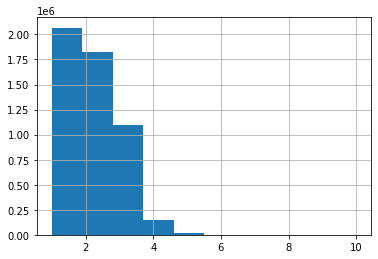

In [ ]:
data_estate['rooms'].hist()

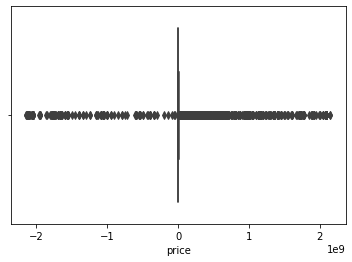

In [ ]:
#Проверим цену и площадь объектов на наличие выбросов:
sns.boxplot(x=data_estate["price"])

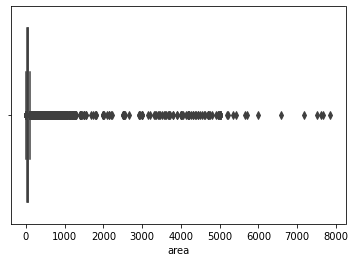

In [ ]:
sns.boxplot(x=data_estate["area"])

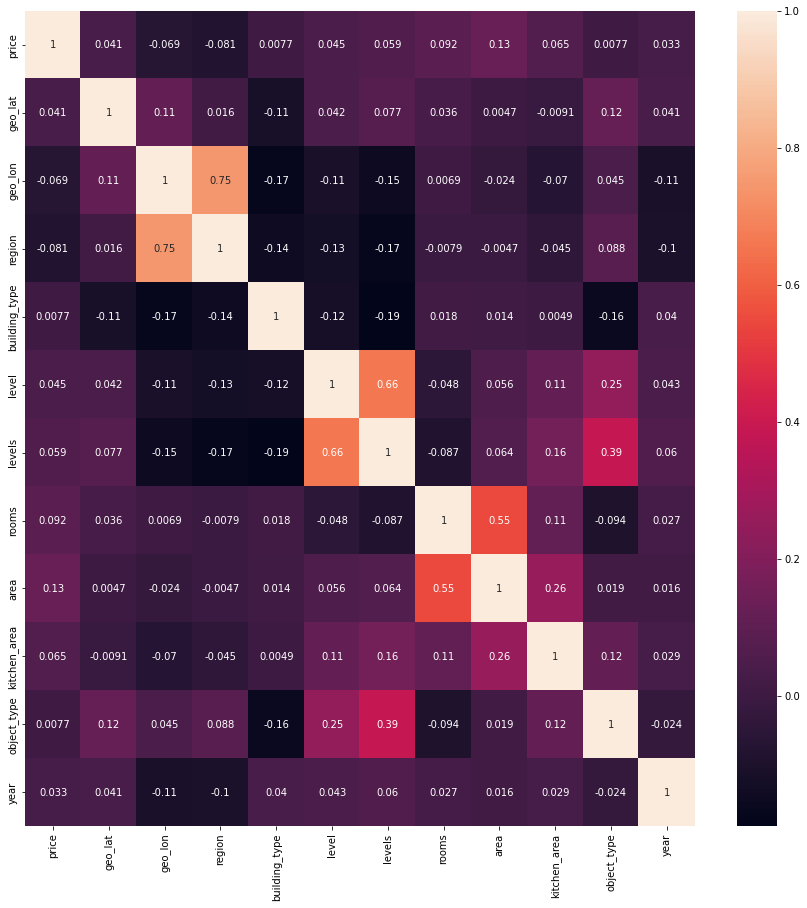

In [ ]:
#посмотрим корреляцию признаков (сравним позже как она изменится после очистки данных от выбросов)
plt.figure(figsize=(15,15))
sns.heatmap(data_estate.corr(), annot = True)

In [ ]:
#Уберем объекты недвижимости площадью менее 15 кв.м. и более 1000 кв.м. для сокращения выбросов.
data_estate.value_counts(data_estate['area']<15)

area
False    5159453
True       11001
dtype: int64

In [ ]:
data_estate.value_counts(data_estate['area']>1000)

area
False    5170264
True         190
dtype: int64

In [ ]:
data_estate = data_estate.loc[data_estate['area'] > 15]
data_estate = data_estate.loc[data_estate['area'] < 1000]

In [ ]:
#Уберем объекты недвижимости с ценой меньше 0 и больше 50 млн.руб. для сокращения выбросов.
data_estate.value_counts(data_estate['price']<=0)

price
False    5157912
True         381
dtype: int64

In [ ]:
data_estate = data_estate.loc[data_estate['price'] > 0]

In [ ]:
data_estate.value_counts(data_estate['price']>50000000)

price
False    5144061
True       13851
dtype: int64

In [ ]:
data_estate = data_estate.loc[data_estate['price'] < 50000000]

In [ ]:
#Проверим корректность признака object_type, исправим для лучшего восприятия информации 11 на 2:
data_estate['object_type'].value_counts()

1     3689780
11    1453953
Name: object_type, dtype: int64

In [ ]:
data_estate.loc[data_estate['object_type']==11, 'object_type'] = 2
data_estate['object_type'].value_counts()

1    3689780
2    1453953
Name: object_type, dtype: int64

In [ ]:
#Проверим корректность признака building_type:
data_estate['building_type'].value_counts()                         

3    1820755
1    1802633
2    1052055
0     285556
4     166957
5      15777
Name: building_type, dtype: int64

In [ ]:
# проверим на наличие дубликатов
data_estate.duplicated().sum()

885281

In [ ]:
# удалим найденные дубликаты
data_estate = data_estate.drop_duplicates().reset_index(drop=True)
data_estate.duplicated().sum()

0

In [ ]:
# создадим новый признак - "стоимость 1 кв.м. объекта недвижимости"
data_estate['stoim_metra'] = round(data_estate['price'] / data_estate['area'],1)
data_estate.head()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,stoim_metra
0,6050000,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,2018,73244.6
1,8650000,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,2018,125180.9
2,4000000,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,2018,60606.1
3,1850000,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,2,2018,48684.2
4,5450000,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,2018,90833.3


In [ ]:
data_estate.shape


(4258452, 13)

# Визуализация данных

In [ ]:
df = pd.DataFrame({'Latitude': data_estate['geo_lat'],'Longitude': data_estate['geo_lon']})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

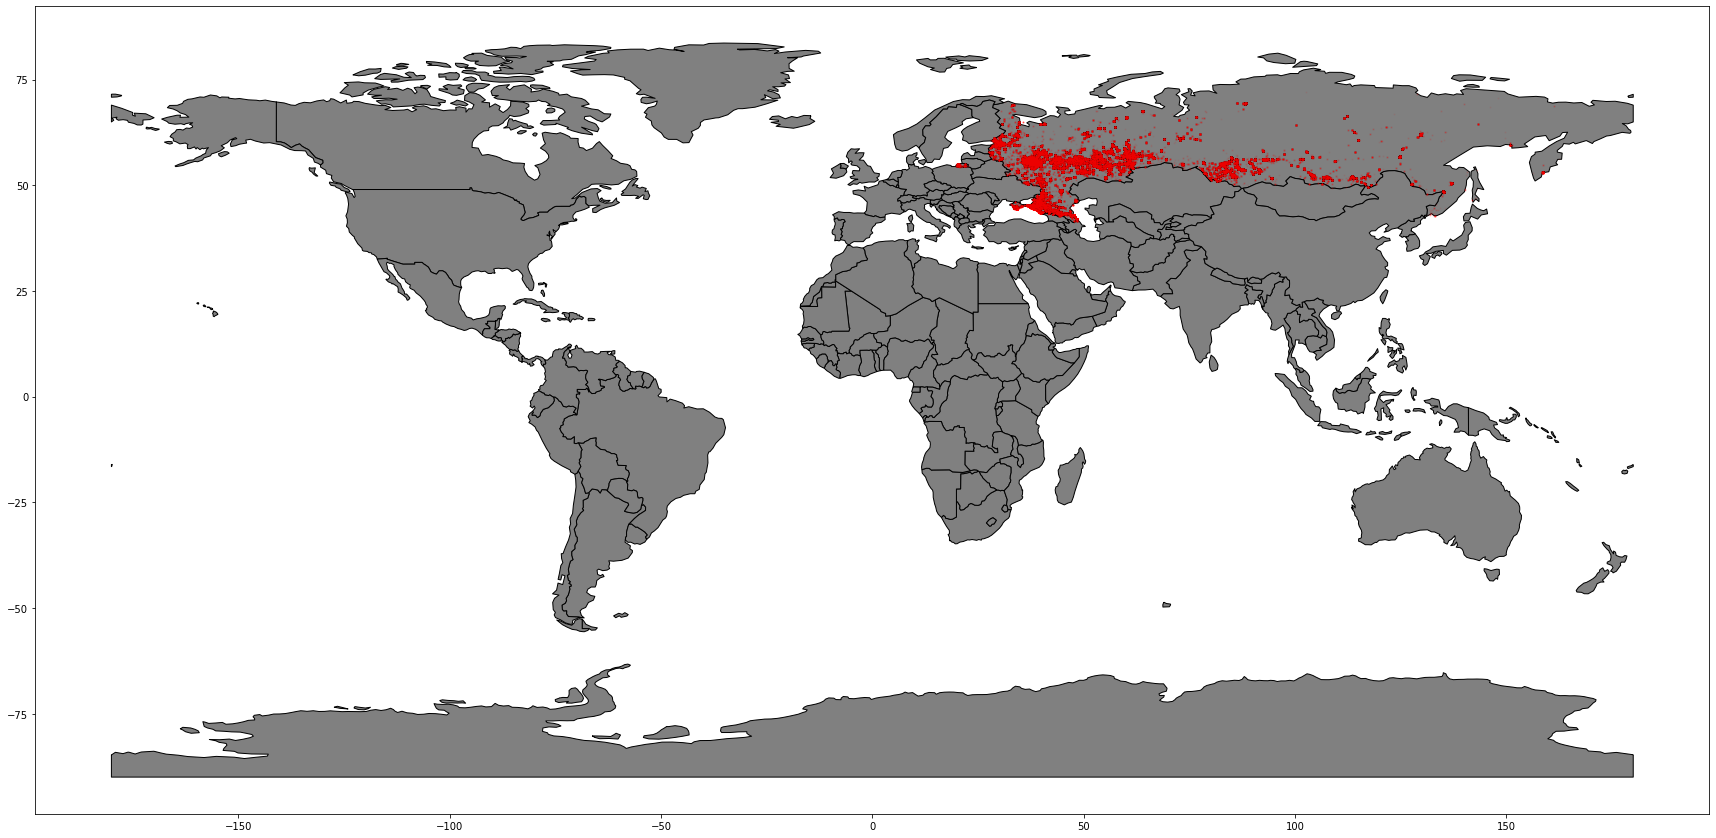

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='grey', edgecolor='black', figsize=(30, 25))
gdf.plot(ax=ax, color='red', markersize=1, alpha=.05)
plt.show()

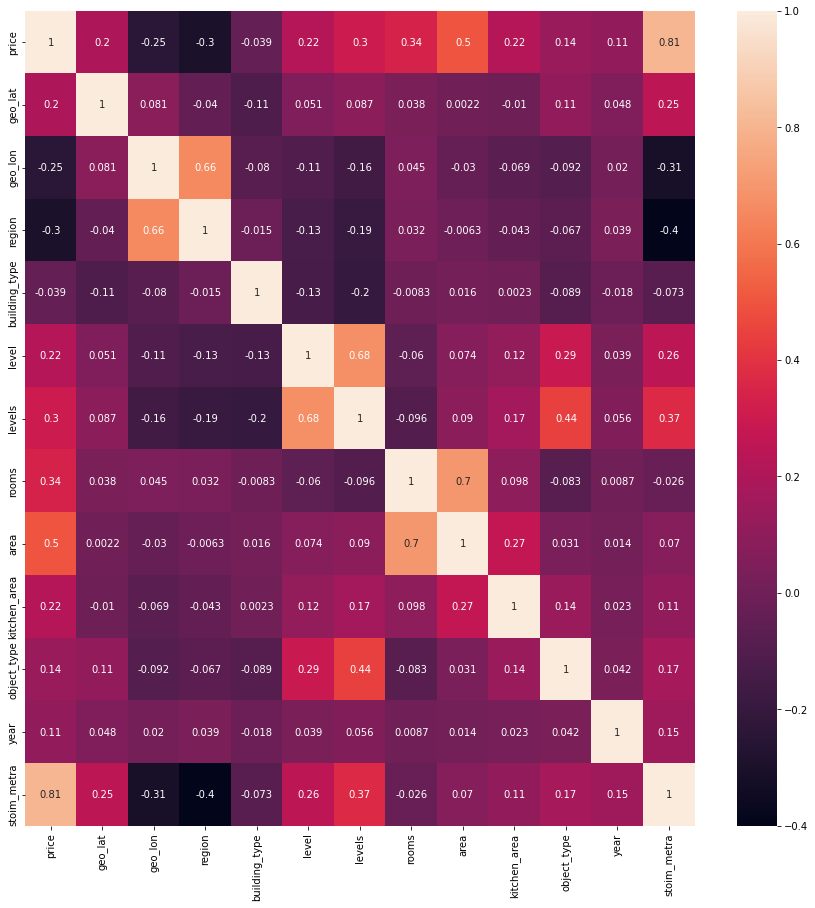

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data_estate.corr(), annot = True)
# улучшилась корреляция целевой переменной с другими признаками

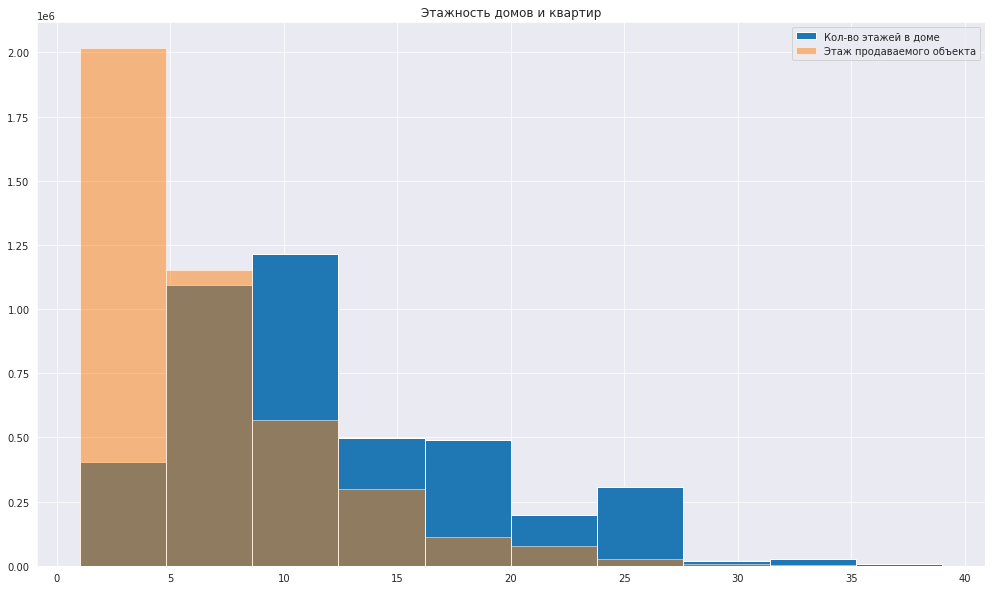

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(17,10))
plt.title('Этажность домов и квартир')
data_estate.levels.hist(label = 'Кол-во этажей в доме')
data_estate.level.hist(label = 'Этаж продаваемого объекта', alpha=0.5)
plt.legend(loc ='upper right')
sns.color_palette("mako", as_cmap=True)
plt.show()

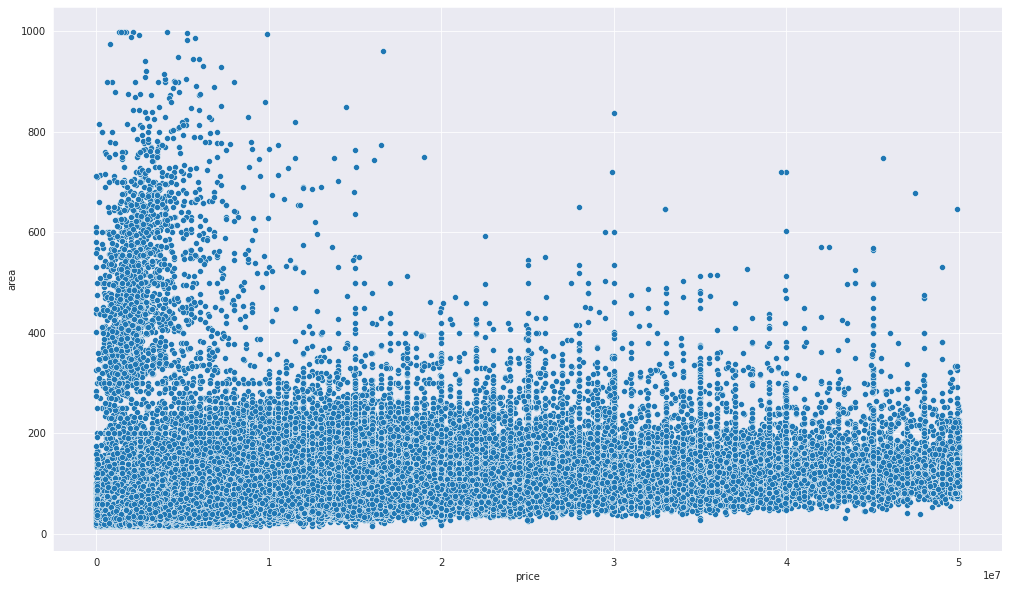

In [ ]:
#взаимосвязь цены и площади объекта
sns.set_style("darkgrid")
plt.figure(figsize=(17,10))
sns.scatterplot(data=data_estate, x = 'price', y="area")

In [ ]:
data_estate['region'].value_counts()

2843     531687
81       461117
2661     411259
3        380322
9654     320948
          ...  
16705       139
69           77
4963         59
1901         12
61888         5
Name: region, Length: 84, dtype: int64

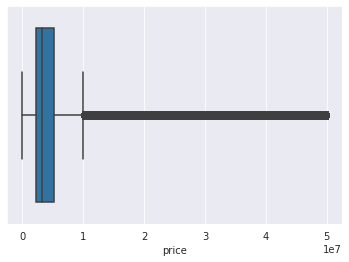

In [ ]:
sns.boxplot(x=data_estate["price"])

In [ ]:
data_estate["price"].describe()/1000000

count     4.258452
mean      4.510376
std       4.283633
min       0.000001
25%       2.160000
50%       3.250000
75%       5.262895
max      49.999999
Name: price, dtype: float64

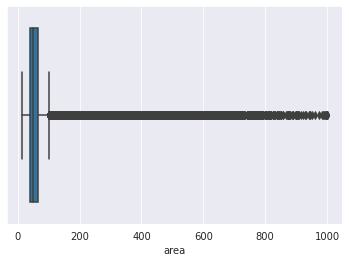

In [ ]:
sns.boxplot(x=data_estate["area"])

In [ ]:
data_estate["area"].describe() / 100

count    42584.520000
mean         0.544054
std          0.248073
min          0.151000
25%          0.390000
50%          0.490000
75%          0.640000
max          9.990000
Name: area, dtype: float64

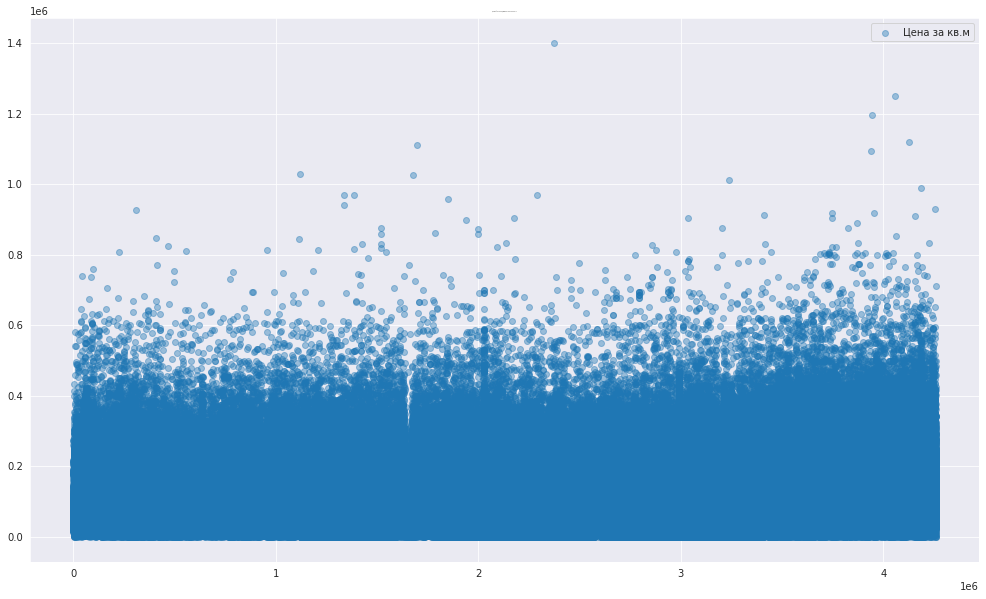

In [ ]:
x = data_estate.index

sns.set_style("darkgrid")
plt.figure(figsize=(17,10))
plt.title('Цены объектов недвижимости в 2018-2021 гг.', fontsize=0.5)
plt.scatter(x=x, y=data_estate['stoim_metra'], label = 'Цена за кв.м', alpha=0.4)
plt.legend(loc ='upper right')
sns.color_palette("mako", as_cmap=True)
plt.show()

# ML. Подготовка train-test выборки

In [ ]:
data_estate.head()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,stoim_metra
0,6050000,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,2018,73244.6
1,8650000,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,2018,125180.9
2,4000000,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,2018,60606.1
3,1850000,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,2,2018,48684.2
4,5450000,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,2018,90833.3


In [ ]:
#разделяем на выборки
from sklearn.model_selection import train_test_split


In [ ]:
y = np.array(pd.DataFrame(data_estate['price']))
X = np.array(data_estate.drop(['price', 'stoim_metra'], axis = 1)) 
print(X.shape)
print(y.shape)
print(data_estate.shape)

(4258452, 11)
(4258452, 1)
(4258452, 13)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True)

In [ ]:
#Сверяем размерности
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3406761, 11)
(3406761, 1)
(851691, 11)
(851691, 1)


# ML. Алгоритмы.

In [ ]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score_lr = round(lr.score(X_test, y_test),10)*100
score_lr

42.76331191

In [ ]:
#Байес
BR = BayesianRidge()
BR.fit(X_train, y_train)
score_BR = round(BR.score(X_test, y_test),10)*100
score_BR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


42.76331517

In [ ]:
RFR = RandomForestRegressor(n_estimators=20, max_depth = 10, min_samples_split = 5, min_samples_leaf = 5)
RFR.fit(X_train, y_train)
score_RFR = round(RFR.score(X_test, y_test),10)*100
score_RFR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


83.27919562

In [ ]:
params = {'n_estimators':20, 'max_depth':10,'learning_rate':0.5}
GBR = GradientBoostingRegressor(**params)
GBR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
GBR = GradientBoostingRegressor(learning_rate=0.5, max_depth=10, n_estimators=20)
GBR.fit(X_train,y_train)
score_GBR = round(GBR.score(X_test, y_test),10)*100

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score_GBR

89.97238998

In [ ]:
srav = {'algoritm':['LinearRegression', 'BayesianRidge','RandomForestRegressor',  'GradientBoostingRegressor'], 
        'score':[score_lr, score_BR, score_RFR, score_GBR]}
srav_df = pd.DataFrame(srav).sort_values(by='score', ascending = False)
srav_df

,algoritm,score
3,GradientBoostingRegressor,89.972390
2,RandomForestRegressor,83.279196
1,BayesianRidge,42.763315
0,LinearRegression,42.763312


# Прогноз рыночной цены

In [ ]:
X_test_pred = [[55.650307,37.857414, 81.0, 1.0, 2.0, 9.0, 2.0, 42.7, 6.0, 1.0, 2021]]
y_test_pred = [6500000.00]
y_pred = GBR.predict(X_test_pred)
y_pred

array([6638001.03837211])

In [ ]:
test_rmse = MSE(y_test_pred, y_pred) ** (1 / 2)
test_rmse

138001.0383721143